# **Credit Risk Analysis using Python**

This notebook analyzes a credit dataset to understand customer risk patterns using
data cleaning, exploratory data analysis (EDA), and feature understanding techniques.



# Problem Statement

The objective of this project is to analyze customer credit data and identify
patterns that indicate credit risk. This analysis helps financial institutions
understand borrower behavior and make better lending decisions.



# Dataset Description

The dataset contains information about customers such as:
- Loan amount
- Annual income
- Credit score
- Employment status
- Loan status (approved / default)

The dataset is divided into training and testing data.


# Reading CSV

In [315]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [316]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DataProjects/day49/credit_train.csv')

# Importing Required Libraries

We use Python libraries such as pandas, numpy, matplotlib, and seaborn
for data manipulation and visualization.


In [317]:
import pandas as pd

# Loading the Dataset

The dataset is loaded into a pandas DataFrame for analysis.

In [318]:
df = pd.read_csv("credit_train.csv")

## Initial Data Inspection

We examine the structure of the dataset using:
- head()
- tail()
- shape()
- columns
- info()
- describe()
- dtypes

This helps understand the number of rows, columns, and data types.


In [319]:
df.head()


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [320]:
df.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
66899,14e28fd4-a468-4b43-938a-9c64a9da7b35,3836f51c-cfd3-4891-8267-41f6ca306f93,Fully Paid,155056,Short Term,722.0,648717.0,4 years,Own Home,Debt Consolidation,3784.23,8.3,50.0,14.0,0.0,72637.0,214544.0,0.0,0.0
66900,06c8afb1-ebd1-4714-8dc4-baf7af0defd6,ad863092-02e8-40b8-a266-2459c839f56e,Fully Paid,99999999,Short Term,732.0,544673.0,10+ years,Home Mortgage,Debt Consolidation,12118.96,17.6,21.0,14.0,2.0,95760.0,484132.0,0.0,1.0
66901,90b8fcb9-b915-48b5-8076-4051a857ca69,004431ad-3530-4ada-931e-4edf6cf9468b,Charged Off,532796,Long Term,742.0,1188716.0,9 years,Home Mortgage,Debt Consolidation,27835.76,19.2,NaN,12.0,0.0,644100.0,1156276.0,0.0,0.0
66902,475b8fd6-3bf0-4e2b-abd6-f4800b70b216,fa92092e-d3c4-499a-bb69-e1f289a9ac64,Fully Paid,100276,Short Term,740.0,894026.0,2 years,Rent,other,6705.29,11.2,NaN,2.0,0.0,27607.0,75570.0,0.0,0.0
66903,79da00c8-ecfe-4973-9630-6c7b0a9c1885,884afe37-a98f-4454-ac38-512e49de8002,Fully Paid,780406,Short Term,715.0,3369897.0,NaN,Home Mortgage,Debt Consolidation,35945.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [321]:
df.shape


(66904, 19)

In [322]:
df.columns


Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [323]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66904 entries, 0 to 66903
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       66904 non-null  object 
 1   Customer ID                   66904 non-null  object 
 2   Loan Status                   66904 non-null  object 
 3   Current Loan Amount           66904 non-null  int64  
 4   Term                          66904 non-null  object 
 5   Credit Score                  54091 non-null  float64
 6   Annual Income                 54091 non-null  float64
 7   Years in current job          64090 non-null  object 
 8   Home Ownership                66904 non-null  object 
 9   Purpose                       66904 non-null  object 
 10  Monthly Debt                  66904 non-null  float64
 11  Years of Credit History       66903 non-null  float64
 12  Months since last delinquent  31223 non-null  float64
 13  N

In [324]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,6.690400e+04,54091.000000,5.409100e+04,66904.000000,66903.000000,31223.00000,66903.000000,66903.000000,6.690300e+04,6.690200e+04,66780.000000,66894.000000
mean,1.179052e+07,1072.977741,1.376147e+06,18438.885584,18.186395,35.03664,11.114449,0.167451,2.957528e+05,7.654305e+05,0.117475,0.028343
std,3.181929e+07,1468.585718,9.345460e+05,12222.778919,6.979754,22.03300,4.986962,0.481381,3.859039e+05,8.844746e+06,0.351515,0.257872
min,1.124200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.797620e+05,705.000000,8.491100e+05,10179.630000,13.500000,16.00000,8.000000,0.000000,1.125750e+05,2.729980e+05,0.000000,0.000000
50%,3.133130e+05,724.000000,1.170818e+06,16192.465000,17.000000,32.00000,10.000000,0.000000,2.098550e+05,4.666860e+05,0.000000,0.000000
75%,5.266360e+05,741.000000,1.647794e+06,23975.957500,21.700000,51.00000,14.000000,0.000000,3.678970e+05,7.840470e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,3.647544e+07,435843.280000,70.500000,176.00000,56.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [325]:
df.dtypes

,0
Loan ID,object
Customer ID,object
Loan Status,object
Current Loan Amount,int64
Term,object
Credit Score,float64
Annual Income,float64
Years in current job,object
Home Ownership,object
Purpose,object


# Filtering

### 1. Select ONE column

In [326]:
df["Loan Status"].head()

,Loan Status
0,Fully Paid
1,Fully Paid
2,Fully Paid
3,Fully Paid
4,Fully Paid


This shows only the Loan Status column.

### 2. Select MULTIPLE columns

In [327]:
df[["Loan ID", "Loan Status", "Annual Income"]].head()


,Loan ID,Loan Status,Annual Income
0,14dd8831-6af5-400b-83ec-68e61888a048,Fully Paid,1167493.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,Fully Paid,NaN
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,Fully Paid,2231892.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,Fully Paid,806949.0
4,d4062e70-befa-4995-8643-a0de73938182,Fully Paid,NaN


## Filter rows using conditions

### 1. Show only Fully Paid loans

In [328]:
df[df["Loan Status"] == "Fully Paid"].head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


### 2. Show only Charged Off loans

In [329]:
df[df["Loan Status"] == "Charged Off"].head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,Charged Off,648714,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0
16,c9a16a9d-8801-4430-b445-dbf9cf845e31,abb4c446-08ea-49ff-aeb8-5e1e9da673e7,Charged Off,653004,Long Term,NaN,NaN,7 years,Home Mortgage,Debt Consolidation,14537.09,20.5,NaN,9.0,0.0,302309.0,413754.0,0.0,0.0
20,150ebbad-ebed-441e-b70d-2f350ad7dca6,40f729c9-54c7-4768-9fb5-2fa41d074c48,Charged Off,317108,Long Term,687.0,1133274.0,8 years,Rent,Debt Consolidation,9632.81,17.4,53.0,4.0,0.0,60287.0,126940.0,0.0,0.0
22,c7e2b784-016b-4fc4-8fde-623f09126557,5b53e176-8fc7-48bf-9d78-ceb5aa284f36,Charged Off,153252,Short Term,714.0,1890690.0,2 years,Rent,Debt Consolidation,21900.35,15.7,NaN,12.0,0.0,891594.0,1081014.0,0.0,0.0


## Filter using numbers (income example)

### Income greater than 50,000

In [330]:
df[df["Annual Income"] > 50000].head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0


## Combine conditions

### Charged Off + Low Income

In [331]:
df[
    (df["Loan Status"] == "Charged Off") &
    (df["Annual Income"] < 40000)
].head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens


# GroupBy

## Basics

### 1. Count loans by Loan Status

In [332]:
df.groupby("Loan Status").size()

,0
Loan Status,
Charged Off,15074
Fully Paid,51830


### 2. Average income by Loan Status

In [333]:
df.groupby("Loan Status")["Annual Income"].mean()

,Annual Income
Loan Status,
Charged Off,1.255540e+06
Fully Paid,1.408447e+06


## Multiple Aggregations


### 1. Mean & Count together

In [334]:
df.groupby("Loan Status").agg(
    avg_income=("Annual Income", "mean"),
    total_loans=("Loan ID", "count")
)

,avg_income,total_loans
Loan Status,,
Charged Off,1.255540e+06,15074
Fully Paid,1.408447e+06,51830


### 2. Average credit score by Loan Status

In [335]:
df.groupby("Loan Status")["Credit Score"].mean()

,Credit Score
Loan Status,
Charged Off,2398.911518
Fully Paid,717.882949


### 3. GroupBy + sort

In [336]:
df.groupby("Loan Status")["Annual Income"].mean().sort_values(ascending=False)

,Annual Income
Loan Status,
Fully Paid,1.408447e+06
Charged Off,1.255540e+06


# Handling Missing Values

Missing values can affect analysis accuracy.
- Numerical missing values were handled using mean/median.
- Categorical missing values were handled using mode.



## Check missing values

In [337]:
df.isnull().sum()

,0
Loan ID,0
Customer ID,0
Loan Status,0
Current Loan Amount,0
Term,0
Credit Score,12813
Annual Income,12813
Years in current job,2814
Home Ownership,0
Purpose,0


## Check percentage of missing values

In [338]:
(df.isnull().sum() / len(df)) * 100

,0
Loan ID,0.000000
Customer ID,0.000000
Loan Status,0.000000
Current Loan Amount,0.000000
Term,0.000000
Credit Score,19.151321
Annual Income,19.151321
Years in current job,4.206027
Home Ownership,0.000000
Purpose,0.000000


 Helps decide drop or fill.

## See rows with missing data

In [339]:
df[df.isnull().any(axis=1)]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66897,3c72c8b7-1866-40ea-b0eb-0e3af47e4c75,d510af64-4bda-4dbe-af86-4e446ac5ff68,Fully Paid,787556,Long Term,680.0,1622676.0,6 years,Home Mortgage,Debt Consolidation,32994.26,16.4,NaN,12.0,0.0,376504.0,1028170.0,0.0,0.0
66898,9af94c21-3c5b-40b3-9c6f-3d1eef619cb2,60310c2f-cf16-4215-88d2-1c810dc6ad3c,Fully Paid,411444,Long Term,717.0,957828.0,10+ years,Own Home,Debt Consolidation,18996.77,21.8,NaN,6.0,0.0,329612.0,721490.0,0.0,0.0
66901,90b8fcb9-b915-48b5-8076-4051a857ca69,004431ad-3530-4ada-931e-4edf6cf9468b,Charged Off,532796,Long Term,742.0,1188716.0,9 years,Home Mortgage,Debt Consolidation,27835.76,19.2,NaN,12.0,0.0,644100.0,1156276.0,0.0,0.0
66902,475b8fd6-3bf0-4e2b-abd6-f4800b70b216,fa92092e-d3c4-499a-bb69-e1f289a9ac64,Fully Paid,100276,Short Term,740.0,894026.0,2 years,Rent,other,6705.29,11.2,NaN,2.0,0.0,27607.0,75570.0,0.0,0.0


Useful for inspection.

# Data Cleaning
In this step:
- Duplicate records were checked
- Data types were corrected
- Irrelevant columns were removed (if any)

This ensures the dataset is clean and reliable.


## 1. Remove Duplicate rows

In [340]:
df.duplicated().sum()


np.int64(4619)

### If duplicates exist :

In [341]:
df.drop_duplicates(inplace=True)

Prevents double counting

## 2. Fix column names

In [342]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


## 3. Handle missing values

In [343]:
print(df.columns)

Index(['loan_id', 'customer_id', 'loan_status', 'current_loan_amount', 'term',
       'credit_score', 'annual_income', 'years_in_current_job',
       'home_ownership', 'purpose', 'monthly_debt', 'years_of_credit_history',
       'months_since_last_delinquent', 'number_of_open_accounts',
       'number_of_credit_problems', 'current_credit_balance',
       'maximum_open_credit', 'bankruptcies', 'tax_liens'],
      dtype='object')


In [344]:
df['annual_income'].dtype

dtype('float64')

In [345]:
df['annual_income'] = pd.to_numeric(df['annual_income'], errors='coerce')

In [346]:
print(df['annual_income'] == pd.to_numeric(df['annual_income'], errors='coerce'))

0         True
1        False
2         True
3         True
4        False
         ...  
66897     True
66900     True
66901     True
66902     True
66903     True
Name: annual_income, Length: 62285, dtype: bool


In [347]:
df['annual_income'] = df['annual_income'].fillna(df['annual_income'].mean())

In [348]:
print(df['annual_income'] == df['annual_income'].fillna(df['annual_income'].mean()))

0        True
1        True
2        True
3        True
4        True
         ... 
66897    True
66900    True
66901    True
66902    True
66903    True
Name: annual_income, Length: 62285, dtype: bool


In [349]:
df['years_in_current_job'] = df['years_in_current_job'].fillna(
    df['years_in_current_job'].mode()[0]
)

In [350]:
print(df['years_in_current_job'] == df['years_in_current_job'].fillna(
    df['years_in_current_job'].mode()[0]
))


0        True
1        True
2        True
3        True
4        True
         ... 
66897    True
66900    True
66901    True
66902    True
66903    True
Name: years_in_current_job, Length: 62285, dtype: bool


## 4. Fix incorrect data types

In [351]:
df['current_loan_amount'] = pd.to_numeric(df['current_loan_amount'], errors="coerce")

In [352]:
print(df['current_loan_amount'] == pd.to_numeric(df['current_loan_amount'], errors="coerce"))


0        True
1        True
2        True
3        True
4        True
         ... 
66897    True
66900    True
66901    True
66902    True
66903    True
Name: current_loan_amount, Length: 62285, dtype: bool


In [353]:
df['current_loan_amount'] = df['current_loan_amount'].fillna(df['current_loan_amount'].mean())

In [354]:
print(df['current_loan_amount'] == df['current_loan_amount'].fillna(df['current_loan_amount'].mean()))

0        True
1        True
2        True
3        True
4        True
         ... 
66897    True
66900    True
66901    True
66902    True
66903    True
Name: current_loan_amount, Length: 62285, dtype: bool


## 5. Handle outliers

In [355]:
Q1 = df['current_loan_amount'].quantile(0.25)
Q3 = df['current_loan_amount'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['current_loan_amount'] >= Q1 - 1.5*IQR) &
        (df['current_loan_amount'] <= Q3 + 1.5*IQR)]

In [356]:
# Calculate IQR
Q1 = df['current_loan_amount'].quantile(0.25)
Q3 = df['current_loan_amount'].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df = df[
    (df['current_loan_amount'] >= Q1 - 1.5 * IQR) &
    (df['current_loan_amount'] <= Q3 + 1.5 * IQR)
]

# Verify result
df['current_loan_amount'].describe()


,current_loan_amount
count,54582.000000
mean,311528.679565
std,185462.476290
min,11242.000000
25%,172304.000000
50%,266882.000000
75%,432080.000000
max,789250.000000


## 6. Validate cleaned data

In [357]:
df.describe()
df.isnull().sum()
df.shape

(54582, 19)

## 7. Save cleaned dataset

In [358]:
df.to_csv("credit_risk_cleaned.csv", index=False)

# Exploratory Data Analysis (EDA)

EDA was performed using:
- Histograms
- Boxplots
- Correlation heatmap

This helped identify relationships between features and credit risk patterns.


## 1. Checking missing values again

In [359]:
df.isnull().sum()

,0
loan_id,0
customer_id,0
loan_status,0
current_loan_amount,0
term,0
credit_score,12813
annual_income,0
years_in_current_job,0
home_ownership,0
purpose,0


## 2. Value Counts(caetogorical analysis)

In [360]:
df['years_in_current_job'].value_counts()

,count
years_in_current_job,
10+ years,19415
2 years,4950
3 years,4436
< 1 year,4420
5 years,3695
1 year,3537
4 years,3335
6 years,3083
7 years,2998


## 3. Basic Visualizations

In [361]:
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Histogram

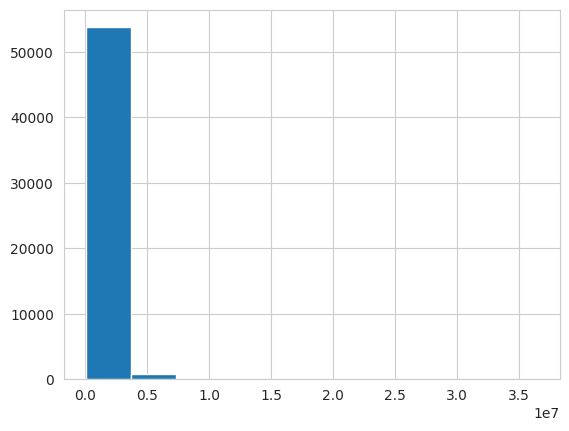

In [362]:
df['annual_income'].hist()
plt.show()

### 2. Boxplot

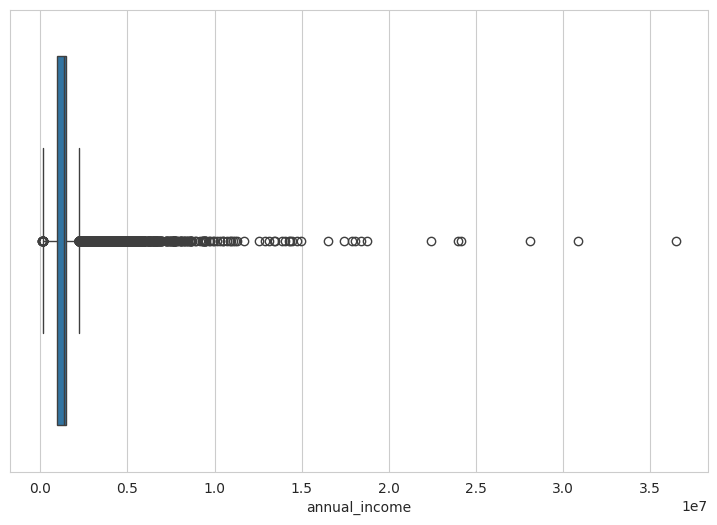

In [363]:
plt.figure(figsize=(9,6))
sns.boxplot(x=df['annual_income'])
plt.show()

### 3. Count plot

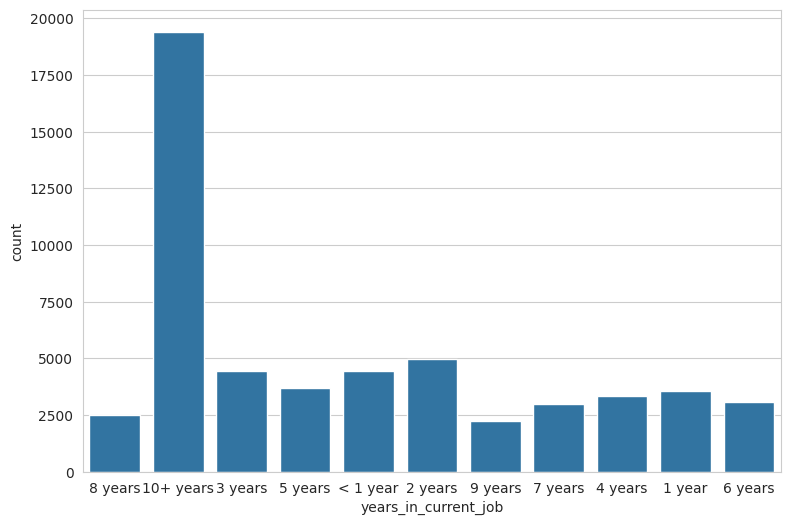

In [364]:
plt.figure(figsize=(9,6))
sns.countplot(x='years_in_current_job', data=df)
plt.show()

## 4. Correlation analysis

In [365]:
df.corr(numeric_only=True)

,current_loan_amount,credit_score,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
current_loan_amount,1.000000,0.018819,0.373195,0.437690,0.157344,-0.036919,0.204373,-0.080561,0.328127,0.036725,-0.102402,0.013566
credit_score,0.018819,1.000000,-0.031218,-0.002191,-0.011402,-0.008859,0.006311,-0.004422,0.001330,-0.002535,-0.005174,-0.001606
annual_income,0.373195,-0.031218,1.000000,0.492218,0.160768,-0.064570,0.146891,-0.015150,0.322292,0.040462,-0.047432,0.043927
monthly_debt,0.437690,-0.002191,0.492218,1.000000,0.194134,-0.058735,0.411412,-0.053536,0.474275,0.036268,-0.076620,0.020338
years_of_credit_history,0.157344,-0.011402,0.160768,0.194134,1.000000,-0.044967,0.130669,0.064281,0.205005,0.027813,0.069213,0.018571
months_since_last_delinquent,-0.036919,-0.008859,-0.064570,-0.058735,-0.044967,1.000000,-0.036053,0.103209,-0.029402,-0.015233,0.121105,0.012106
number_of_open_accounts,0.204373,0.006311,0.146891,0.411412,0.130669,-0.036053,1.000000,-0.012333,0.230416,0.031173,-0.024038,0.010389
number_of_credit_problems,-0.080561,-0.004422,-0.015150,-0.053536,0.064281,0.103209,-0.012333,1.000000,-0.108160,-0.010143,0.749075,0.576859
current_credit_balance,0.328127,0.001330,0.322292,0.474275,0.205005,-0.029402,0.230416,-0.108160,1.000000,0.133350,-0.119008,-0.011538
maximum_open_credit,0.036725,-0.002535,0.040462,0.036268,0.027813,-0.015233,0.031173,-0.010143,0.133350,1.000000,-0.013017,-0.000688


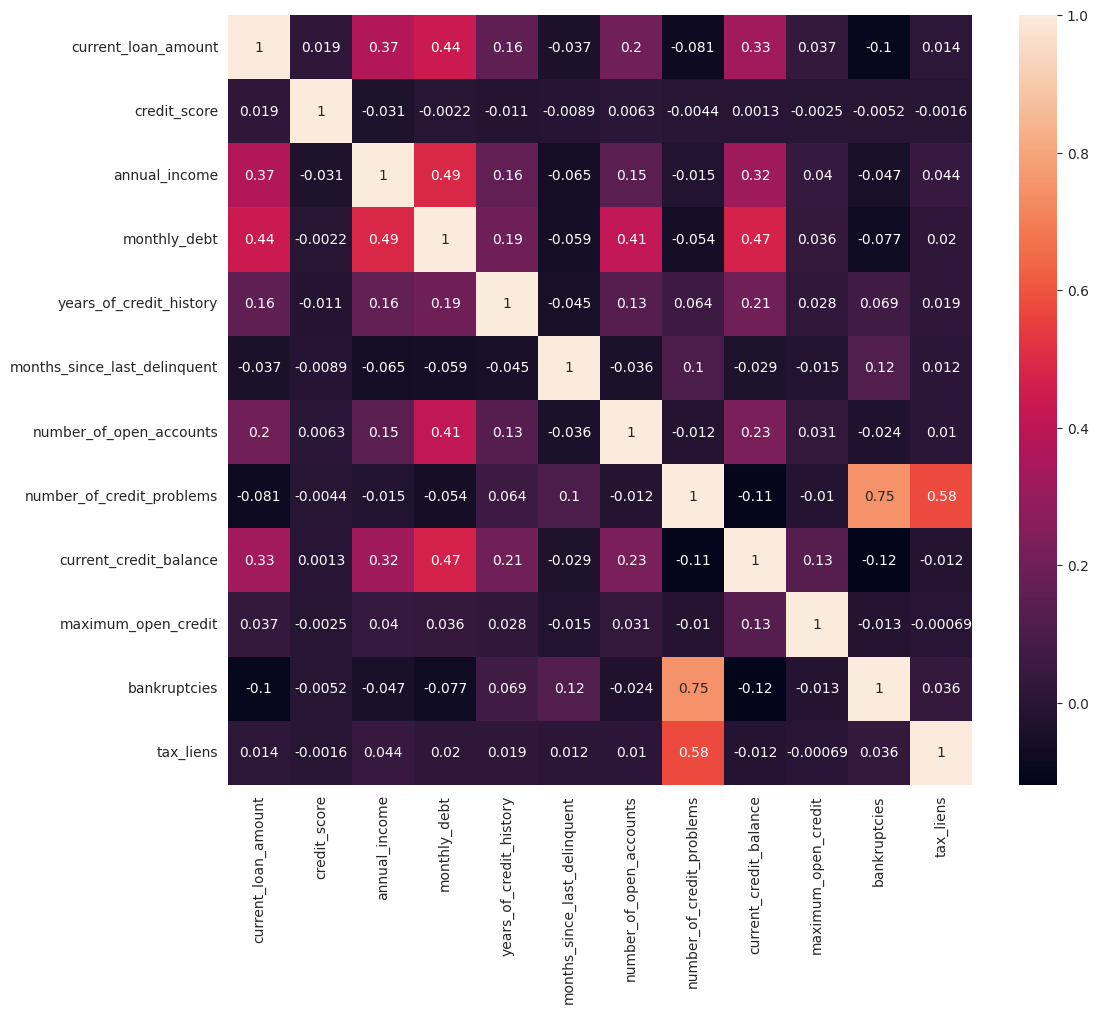

In [366]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

# Mini EDA Flow(EDA Summary)

## 1. Numerical Feature Analysis

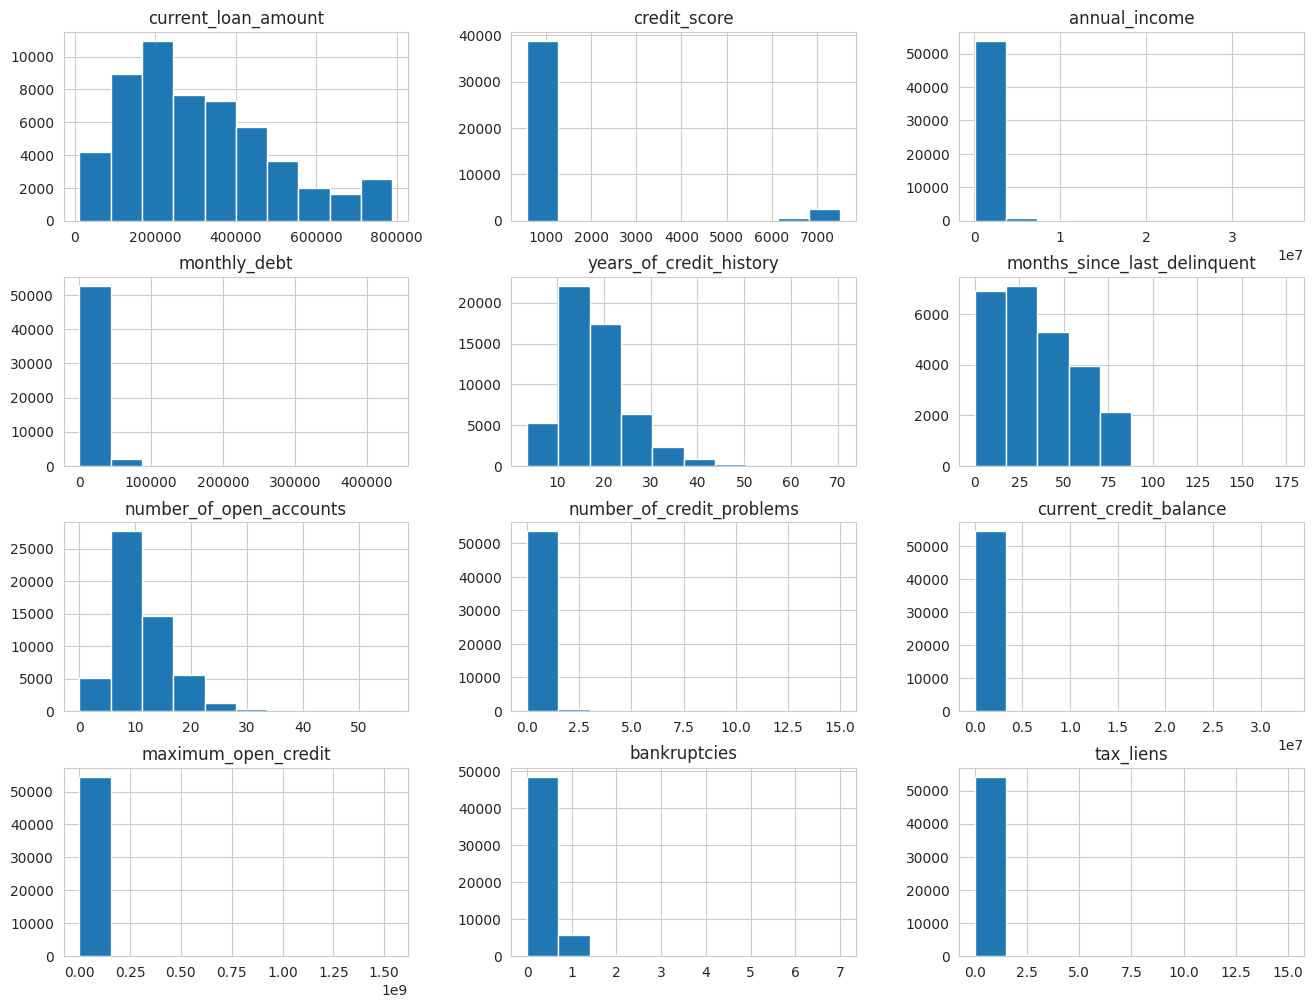

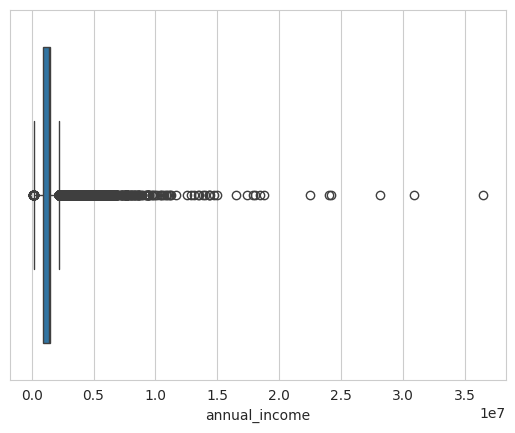

In [367]:
df.hist(figsize=(16,12))
plt.show()
sns.boxplot(x=df['annual_income'])
plt.show()

## 2. Categorical Feature Analysis

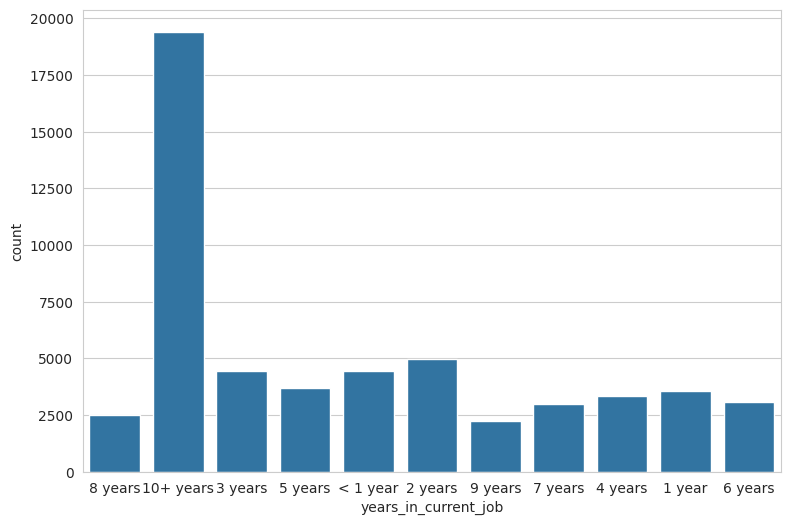

In [368]:
plt.figure(figsize=(9,6))
df['years_in_current_job'].value_counts()
sns.countplot(x='years_in_current_job', data=df)
plt.show()

## 3. Correlation Analysis

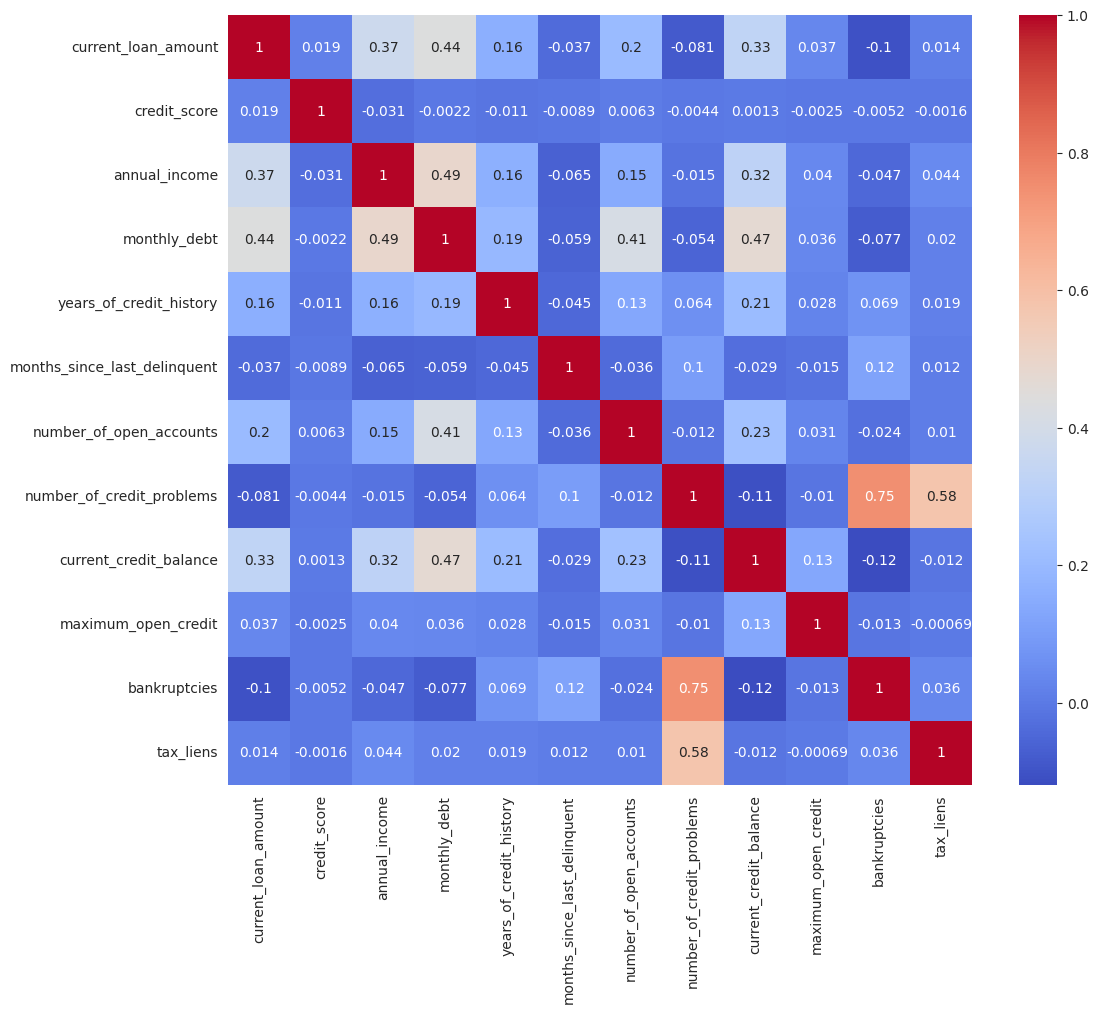

In [369]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

# Data Cleaning

## 1. Remove duplicate rows

In [370]:
df = df.drop_duplicates()

## 2. Handling missing values

In [371]:
df.isnull().sum()

,0
loan_id,0
customer_id,0
loan_status,0
current_loan_amount,0
term,0
credit_score,12813
annual_income,0
years_in_current_job,0
home_ownership,0
purpose,0


In [372]:
# Numerical columns
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(
    df[num_cols].median()
)

# Categorical columns
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna(
    df[cat_cols].mode().iloc[0]
)

## 3. Standardizing column names

In [373]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [374]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 54582 entries, 0 to 66903
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   loan_id                       54582 non-null  object 
 1   customer_id                   54582 non-null  object 
 2   loan_status                   54582 non-null  object 
 3   current_loan_amount           54582 non-null  int64  
 4   term                          54582 non-null  object 
 5   credit_score                  54582 non-null  float64
 6   annual_income                 54582 non-null  float64
 7   years_in_current_job          54582 non-null  object 
 8   home_ownership                54582 non-null  object 
 9   purpose                       54582 non-null  object 
 10  monthly_debt                  54582 non-null  float64
 11  years_of_credit_history       54582 non-null  float64
 12  months_since_last_delinquent  54582 non-null  float64
 13  number

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,annual_income,years_in_current_job,home_ownership,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.74,17.2,32.0,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,725.0,1.373987e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,8.069490e+05,3 years,Own Home,Debt Consolidation,8741.90,12.0,32.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,725.0,1.373987e+06,5 years,Rent,Debt Consolidation,20639.70,6.1,32.0,15.0,0.0,253460.0,427174.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602,Short Term,7290.0,8.968570e+05,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,32.0,6.0,0.0,215308.0,272448.0,0.0,0.0


# EDA(Exploratory Data Analysis)

## 1. Import libraries

In [375]:
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Target variable distribution

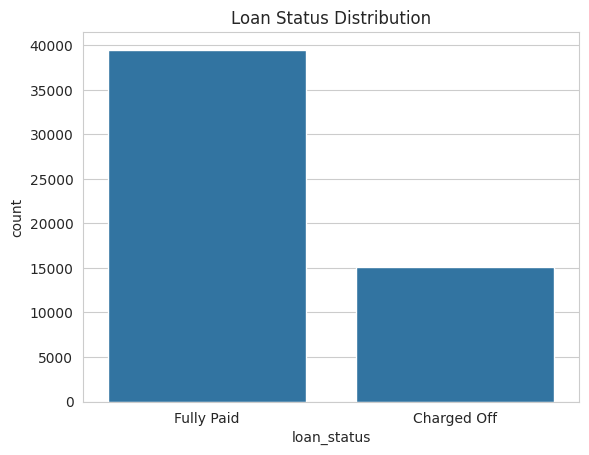

In [376]:
df['loan_status'].value_counts()
sns.countplot(x='loan_status', data=df)
plt.title("Loan Status Distribution")
plt.show()

## 3. Numerical feature distributions

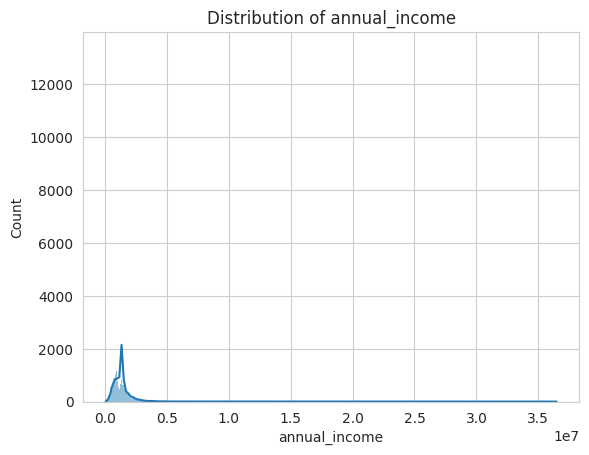

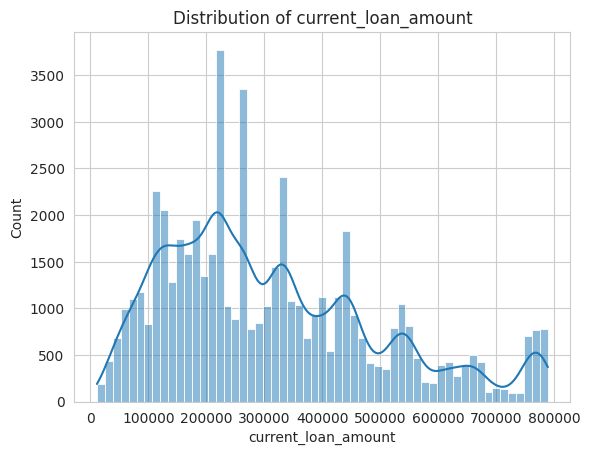

In [377]:
num_features = ['annual_income', 'current_loan_amount']
for col in num_features:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

## 4. Categorical feature analysis

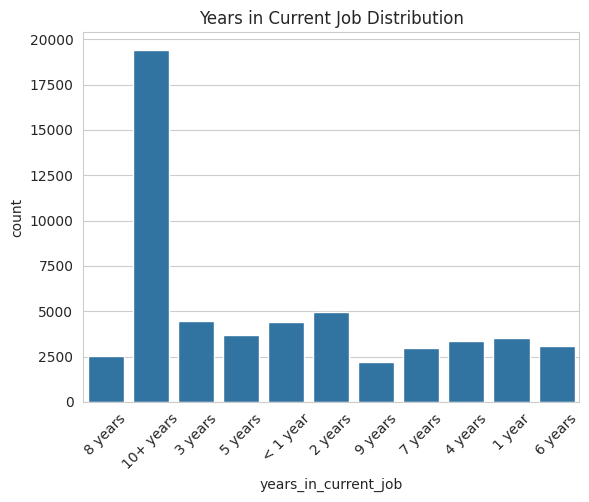

In [378]:
sns.countplot(x='years_in_current_job', data=df)
plt.xticks(rotation=45)
plt.title("Years in Current Job Distribution")
plt.show()

## 5. Relationship with target

### 1. Numerical vs target :

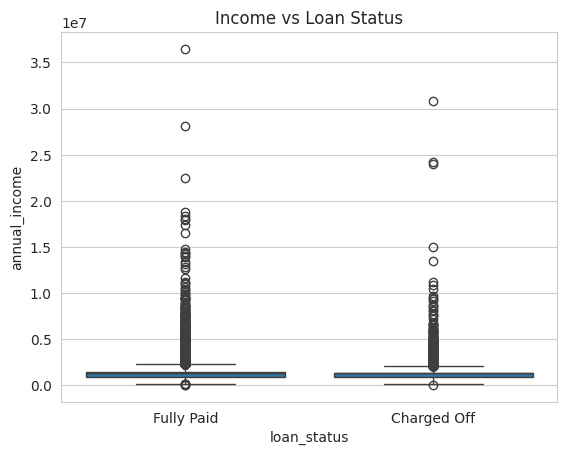

In [379]:
sns.boxplot(x='loan_status', y='annual_income', data=df)
plt.title("Income vs Loan Status")
plt.show()

### 2. Categorical vs target :

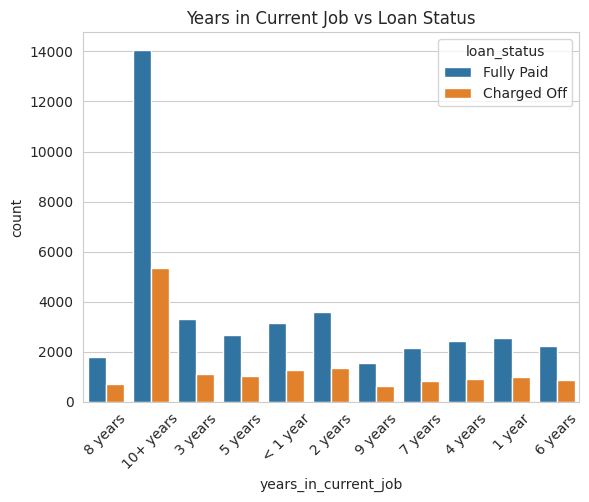

In [380]:
sns.countplot(x='years_in_current_job', hue='loan_status', data=df)
plt.xticks(rotation=45)
plt.title("Years in Current Job vs Loan Status")
plt.show()

## 6. Correlation heatmap

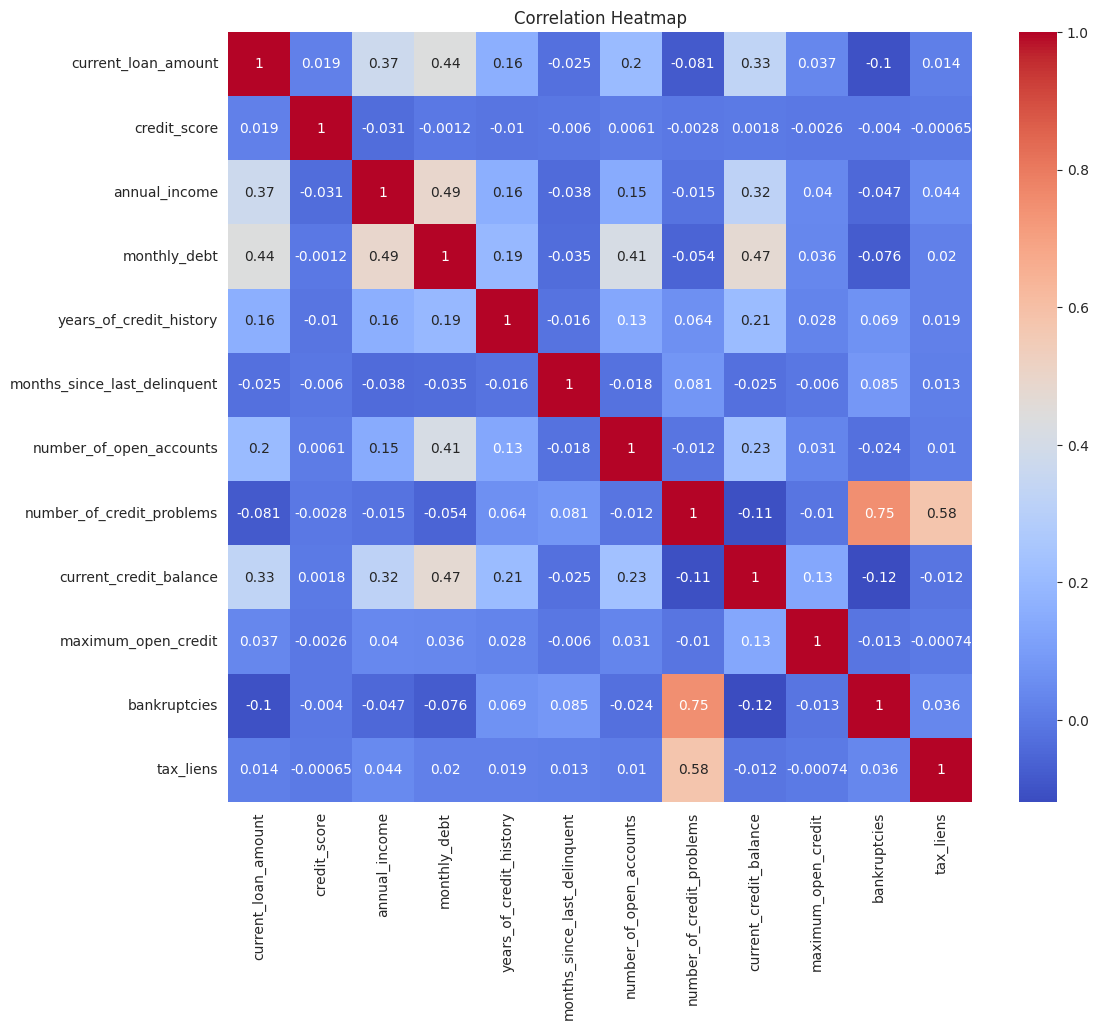

In [381]:
plt.figure(figsize=(12,10))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Data visualization

## 1. Import libraries

In [382]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: nicer style
sns.set_style('whitegrid')


## 2. Load cleaned dataset

In [383]:
credit_train = pd.read_csv('credit_risk_cleaned.csv')

## 3. Visualize categorical features

### 1. Count plot - Loan Status

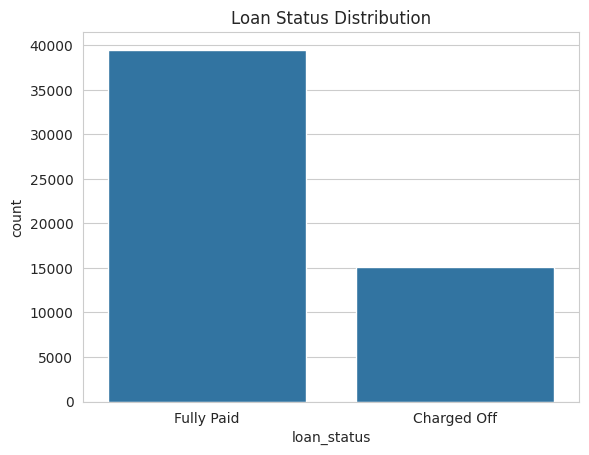

In [384]:
sns.countplot(x='loan_status', data=credit_train)
plt.title('Loan Status Distribution')
plt.show()

### 2. Count plot - Employment Status

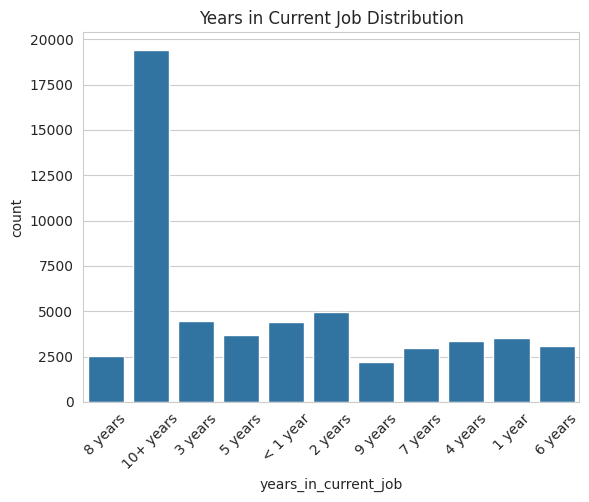

In [385]:
sns.countplot(x='years_in_current_job', data=credit_train)
plt.title('Years in Current Job Distribution')
plt.xticks(rotation=45)
plt.show()

## 4. Visualize numerical features

### 1. Histogram - Annual Income

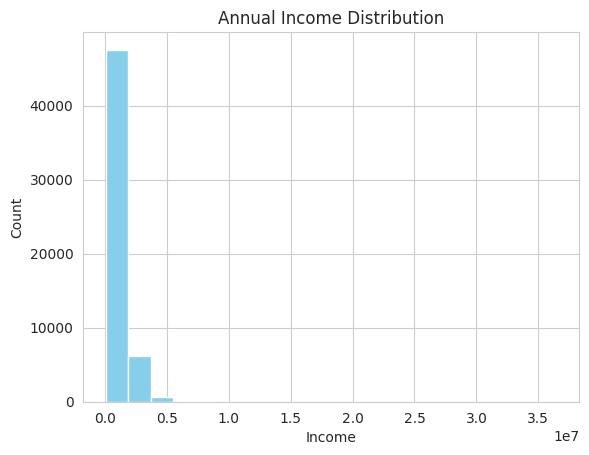

In [386]:
plt.hist(credit_train['annual_income'], bins=20, color='skyblue')
plt.title('Annual Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


### 2. Boxplot - Loan Amount

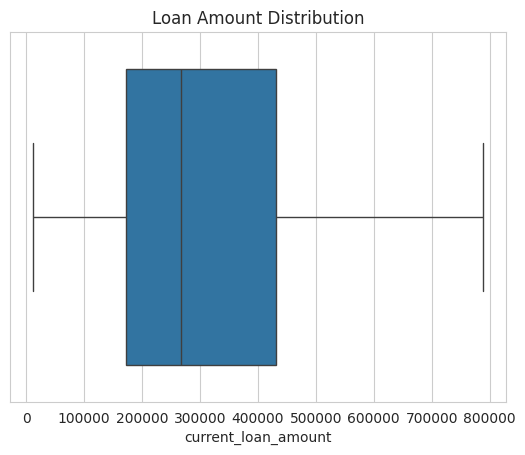

In [387]:
sns.boxplot(x=credit_train['current_loan_amount'])
plt.title('Loan Amount Distribution')
plt.show()

## 5. Relationship visualizations

### 1. Scatter plot - Credit Score vs Loan Amount

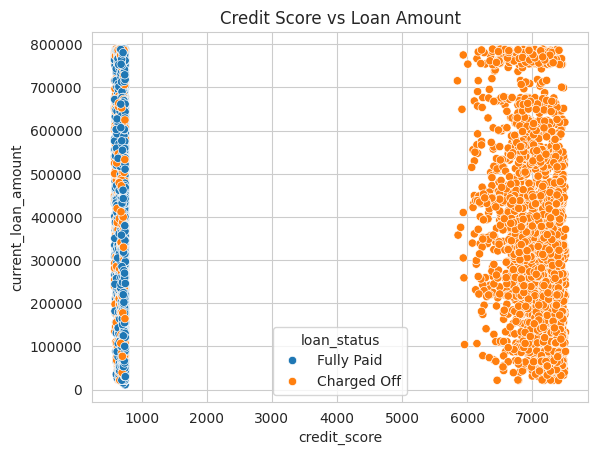

In [388]:
sns.scatterplot(x='credit_score', y='current_loan_amount', hue='loan_status', data=credit_train)
plt.title('Credit Score vs Loan Amount')
plt.show()

### 2. Correlation heatmap

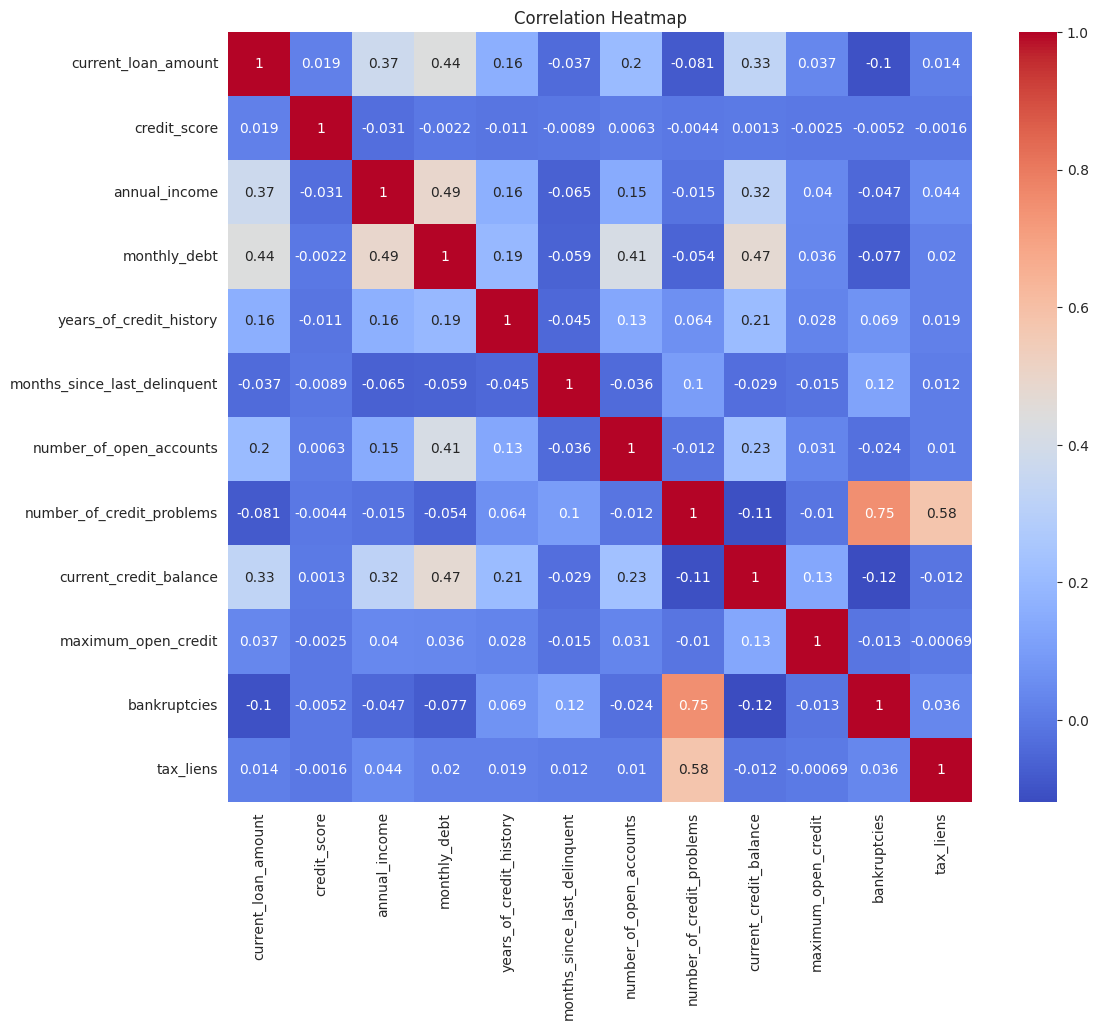

In [389]:
plt.figure(figsize=(12,10))
sns.heatmap(credit_train.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 6. GroupBy visualizations

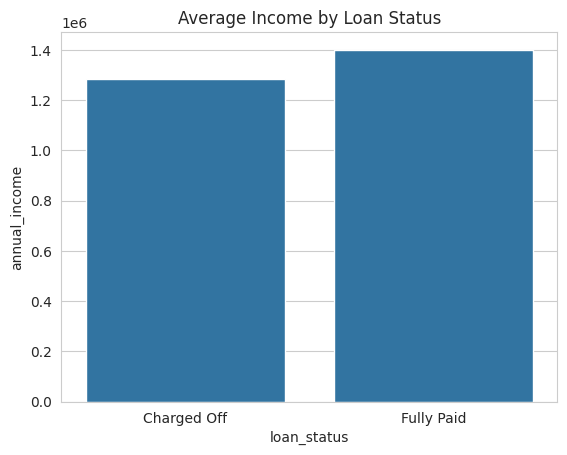

In [390]:
income_by_status = credit_train.groupby('loan_status')['annual_income'].mean().reset_index()
sns.barplot(x='loan_status', y='annual_income', data=income_by_status)
plt.title('Average Income by Loan Status')
plt.show()

# Outlier Detection and feature understanding

## Outlier Detection

Outliers were detected using:
- IQR (Interquartile Range) method
- Boxplots for visualization

Extreme values were removed to avoid skewed analysis.

## Feature Understanding

Numerical and categorical features were analyzed using:
- describe()
- value_counts()

This helped understand data distribution and feature importance.


## 1. Load cleaned dataset

In [391]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned credit_train dataset
df = credit_train.copy()

## 2. Detect outliers

### 1. Loan Amount

In [392]:
# Choose a numeric column (example: loan_amount)
Q1 = df['current_loan_amount'].quantile(0.25)
Q3 = df['current_loan_amount'].quantile(0.75)
IQR = Q3 - Q1

# Filter out extreme outliers
df_outliers_removed = df[
    (df['current_loan_amount'] >= Q1 - 1.5*IQR) &
    (df['current_loan_amount'] <= Q3 + 1.5*IQR)
]

### 2. Annual Income

In [393]:
# Choose a numeric column (example: loan_amount)
Q1 = df['annual_income'].quantile(0.25)
Q3 = df['annual_income'].quantile(0.75)
IQR = Q3 - Q1

# Filter out extreme outliers
df_outliers_removed = df[
    (df['annual_income'] >= Q1 - 1.5*IQR) &
    (df['annual_income'] <= Q3 + 1.5*IQR)
]


### 3. Credit Score

In [394]:
# Choose a numeric column (example: loan_amount)
Q1 = df['credit_score'].quantile(0.25)
Q3 = df['credit_score'].quantile(0.75)
IQR = Q3 - Q1

# Filter out extreme outliers
df_outliers_removed = df[
    (df['credit_score'] >= Q1 - 1.5*IQR) &
    (df['credit_score'] <= Q3 + 1.5*IQR)
]


## 3. Detect outliers visually(boxplots)

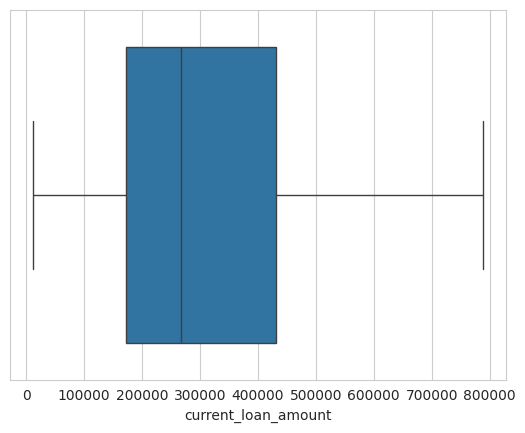

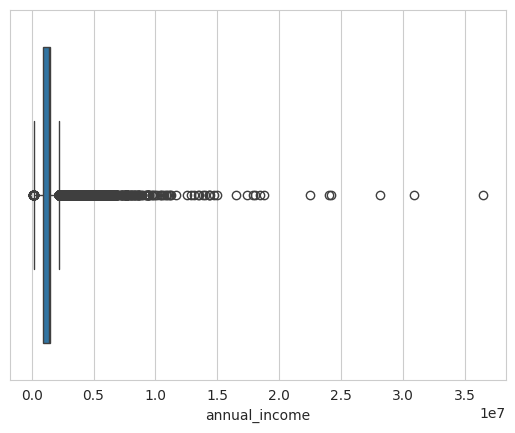

In [395]:
sns.boxplot(x=df['current_loan_amount'])
plt.show()

sns.boxplot(x=df['annual_income'])
plt.show()

## 4. Feature understanding(Basics)

### 1. Numeric Features

In [396]:
df.describe

<bound method NDFrame.describe of                                     loan_id  \
0      14dd8831-6af5-400b-83ec-68e61888a048   
1      4771cc26-131a-45db-b5aa-537ea4ba5342   
2      77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a   
3      d4062e70-befa-4995-8643-a0de73938182   
4      89d8cb0c-e5c2-4f54-b056-48a645c543dd   
...                                     ...   
54577  91318fa7-b423-462b-890b-8039d6f8c905   
54578  3c72c8b7-1866-40ea-b0eb-0e3af47e4c75   
54579  90b8fcb9-b915-48b5-8076-4051a857ca69   
54580  475b8fd6-3bf0-4e2b-abd6-f4800b70b216   
54581  79da00c8-ecfe-4973-9630-6c7b0a9c1885   

                                customer_id  loan_status  current_loan_amount  \
0      981165ec-3274-42f5-a3b4-d104041a9ca9   Fully Paid               445412   
1      2de017a3-2e01-49cb-a581-08169e83be29   Fully Paid               262328   
2      e777faab-98ae-45af-9a86-7ce5b33b1011   Fully Paid               347666   
3      81536ad9-5ccf-4eb8-befb-47a4d608658e   Fully Paid               176220   
4      4ffe99d3-7f2a-44db-afc1-40943f1f9750  Charged Off               206602   
...                                     ...          ...                  ...   
54577  24e80634-11ff-42f8-acc6-c88fd4ac187c  Charged Off               164384   
54578  d510af64-4bda-4dbe-af86-4e446ac5ff68   Fully Paid               787556   
54579  004431ad-3530-4ada-931e-4edf6cf9468b  Charged Off               532796   
54580  fa92092e-d3c4-499a-bb69-e1f289a9ac64   Fully Paid               100276   
54581  884afe37-a98f-4454-ac38-512e49de8002   Fully Paid               780406   

             term  credit_score  annual_income years_in_current_job  \
0      Short Term         709.0   1.167493e+06              8 years   
1      Short Term           NaN   1.373987e+06            10+ years   
2       Long Term         721.0   8.069490e+05              3 years   
3      Short Term           NaN   1.373987e+06              5 years   
4      Short Term        7290.0   8.968570e+05            10+ years   
...           ...           ...            ...                  ...   
54577  Short Term         744.0   6.538280e+05               1 year   
54578   Long Term         680.0   1.622676e+06              6 years   
54579   Long Term         742.0   1.188716e+06              9 years   
54580  Short Term         740.0   8.940260e+05              2 years   
54581  Short Term         715.0   3.369897e+06            10+ years   

      home_ownership             purpose  monthly_debt  \
0      Home Mortgage   Home Improvements       5214.74   
1      Home Mortgage  Debt Consolidation      33295.98   
2           Own Home  Debt Consolidation       8741.90   
3               Rent  Debt Consolidation      20639.70   
4      Home Mortgage  Debt Consolidation      16367.74   
...              ...                 ...           ...   
54577           Rent  Debt Consolidation      13185.43   
54578  Home Mortgage  Debt Consolidation      32994.26   
54579  Home Mortgage  Debt Consolidation      27835.76   
54580           Rent               other       6705.29   
54581  Home Mortgage  Debt Consolidation      35945.50   

       years_of_credit_history  months_since_last_delinquent  \
0                         17.2                           NaN   
1                         21.1                           8.0   
2                         12.0                           NaN   
3                          6.1                           NaN   
4                         17.3                           NaN   
...                        ...                           ...   
54577                      9.3                           NaN   
54578                     16.4                           NaN   
54579                     19.2                           NaN   
54580                     11.2                           NaN   
54581                      NaN                           NaN   

       number_of_open_accounts  number_of_credit_problems  \
0                          6.0                  

### 2. Categorical Features

In [397]:
df['loan_status'].value_counts()
df['years_in_current_job'].value_counts()

,count
years_in_current_job,
10+ years,19415
2 years,4950
3 years,4436
< 1 year,4420
5 years,3695
1 year,3537
4 years,3335
6 years,3083
7 years,2998


### 3. Correlation(Relationship between features)

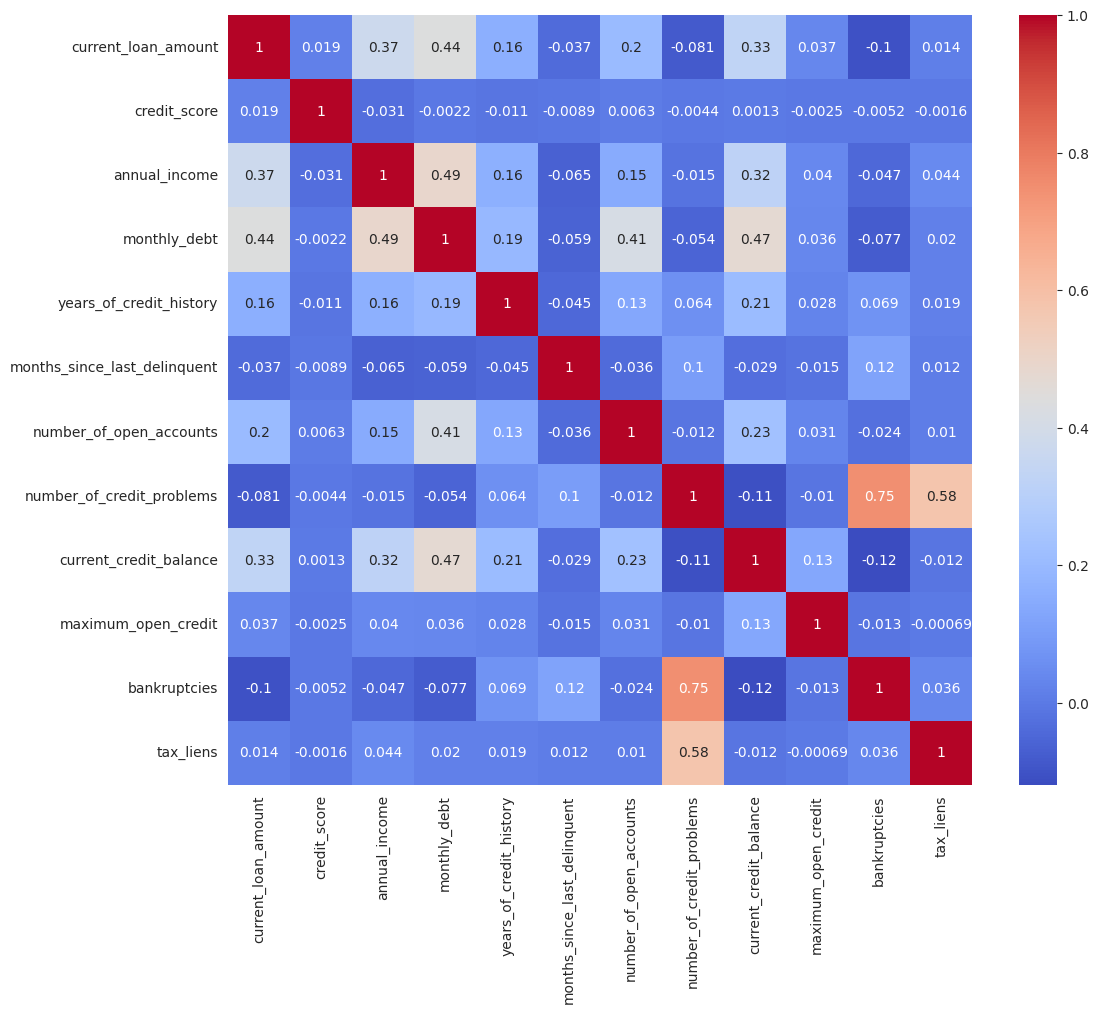

In [398]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

# Key Insights

- Higher loan amounts tend to have higher risk
- Credit score shows strong correlation with loan status
- Income level impacts loan approval decisions


# Conclusion

This analysis provided meaningful insights into customer credit behavior.
The cleaned and analyzed dataset can be used for dashboards,
predictive modeling, or business decision-making.


# **Future Work**

- Build a machine learning model for credit risk prediction
- Integrate results into Power BI dashboards
- Perform feature engineering for better accuracy
